                                                      ASSIGNMENT 2 - Spatial Filtering

AUC PERERA - D/ENG/21/0079/EE


Question 1

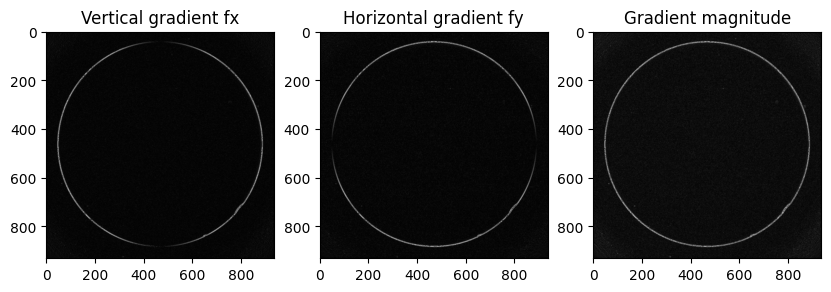

Center coordinates of the contact lens: ( 467 ,  463 )


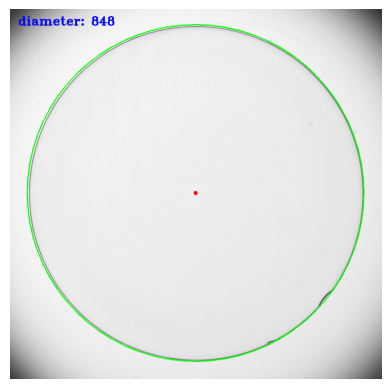

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#IMPORTING THE IMAGE
img = cv.imread('images/contact_lens.tif')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# gradient in the x-direction by using the sobel kernal
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1,0)
# gradient in the y-direction by using the sobel kernal 
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0,1) #cv.CV_64F specifies the data type of the output image, wgich is 64-bit floating-point
# computing the gradient magnitude
gradient_mag = cv.addWeighted(np.absolute(sobel_x), 1, np.absolute(sobel_y), 1, 0)

#ploting 
fig , ax = plt.subplots(1, 3, figsize=(10,5)) #creates a figure with one row and three columns of subplots
ax[0].imshow(np.absolute(sobel_x).astype('uint8'), cmap='gray')
ax[0].set_title("Vertical gradient fx")
ax[1].imshow(np.absolute(sobel_y).astype('uint8'), cmap='gray')
ax[1].set_title("Horizontal gradient fy")
ax[2].imshow(gradient_mag.astype('uint8'), cmap='gray')
ax[2].set_title("Gradient magnitude")
plt.show()

blur = cv.GaussianBlur(img_gray, (5,5), 0) # reducing noise by applying Gaussian blur
edges = cv.Canny(blur, 50, 150) # detecting the edges of the circular object by applying Canny edge detection 
y_coord , x_coord = np.where(edges !=0) # detecting the coordinates of the non-zero pixels in the edge image

# by calculating the mean of the pixel coordinates, we are able to find the center of the contact lens
center_x = int(np.mean(x_coord))
center_y = int(np.mean(y_coord))
print("Center coordinates of the contact lens:", "(",center_x, ", ", center_y, ")")

#calculating the Euclidean distance between the center point and each edge pixel 
distances = np.sqrt((x_coord - center_x)**2 + (y_coord - center_y)**2)
diameter = int(2*np.max(distances)) # finding the diameter of the contact lens
cv.circle(img, (center_x, center_y), 5, (0,0,255), -1) # drawing th center on the original image
cv.circle(img, (center_x, center_y), diameter // 2, (0,255,0), 2) # drawing the diameter on the original image
cv.putText(img, f"diameter: {diameter}", (20, 40), cv.FONT_HERSHEY_TRIPLEX, 1, (255,0,0), 2)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) # final result 
plt.axis('off')
plt.show()




Quesstion 2 

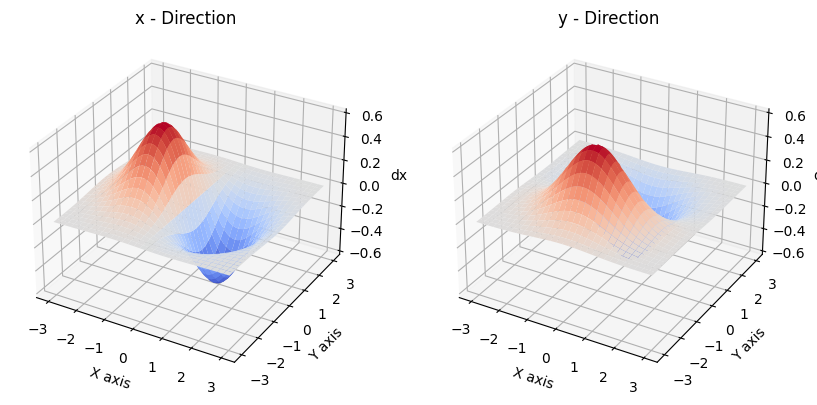

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# defining the domain
x = y = np.arange(-3, 3.1, 0.1)
X, Y = np.meshgrid(x,y) # takes the one-dimensional arrays x and y as input and generates two-dimensional arrays of their Cartesian products (X and Y)

# defining the sigma value
sigma = 1

dx = (-X / sigma ** 2) * np.exp(-(X ** 2 + Y ** 2) / (2 * sigma ** 2))
dy = (-Y / sigma ** 2) * np.exp(-(X ** 2 + Y ** 2) / (2 * sigma ** 2))
fig = plt.figure(figsize =(10,5))
# derivative of gaussian kernals with respect to X and Y 
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, dx, cmap='coolwarm')
ax.set_title('x - Direction')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('dx')
ax = fig.add_subplot(1 ,2, 2, projection ='3d')
ax.plot_surface(X, Y, dy, cmap="coolwarm")
ax.set_title('y - Direction')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('dy')
plt.show()

Question 3